In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas  as pd    

%matplotlib inline


In [40]:
import tensorflow as tf

In [41]:
tf.__version__

'2.13.0'

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [47]:
datesetq = pd.read_csv('DataSet_for_ANN.csv')

In [48]:
datesetq.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
datesetq.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [50]:
X = datesetq.iloc[:, 3:-1].values
y = datesetq.iloc[:, -1].values

In [51]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [52]:
print(y)

[1 0 1 ... 1 1 0]


In [53]:
le=LabelEncoder()

In [54]:
X[:, 2] = le.fit_transform(X[:, 2])

In [55]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [56]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [57]:
print(X)


[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [58]:
X[:,0:4]

array([[1.0, 0.0, 0.0, 619],
       [0.0, 0.0, 1.0, 608],
       [1.0, 0.0, 0.0, 502],
       ...,
       [1.0, 0.0, 0.0, 709],
       [0.0, 1.0, 0.0, 772],
       [1.0, 0.0, 0.0, 792]], dtype=object)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [61]:
ann=tf.keras.models.Sequential()

In [62]:
X_train


array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [63]:
X_test

array([[-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [64]:
X_train.shape

(8000, 12)

In [65]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [66]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [67]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
results=ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5882 - accuracy: 0.7021
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4646 - accuracy: 0.8056
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8136
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8226
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8307
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3928 - accuracy: 0.8349
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3853 - accuracy: 0.8378
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3785 - accuracy: 0.8414
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8443
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3676 - accura

In [68]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (32, 6)                   78        
                                                                 
 dense_4 (Dense)             (32, 6)                   42        
                                                                 
 dense_5 (Dense)             (32, 1)                   7         
                                                                 
Total params: 127 (508.00 Byte)
Trainable params: 127 (508.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
results.history['accuracy']

[0.7021250128746033,
 0.8056250214576721,
 0.8136249780654907,
 0.8226249814033508,
 0.8307499885559082,
 0.8348749876022339,
 0.8377500176429749,
 0.8413749933242798,
 0.8442500233650208,
 0.846750020980835,
 0.8497499823570251,
 0.8522499799728394,
 0.8543750047683716,
 0.8543750047683716,
 0.8560000061988831,
 0.8556249737739563,
 0.8585000038146973,
 0.8600000143051147,
 0.8604999780654907,
 0.8600000143051147,
 0.8608750104904175,
 0.8615000247955322,
 0.8603749871253967,
 0.8603749871253967,
 0.8612499833106995,
 0.8633750081062317,
 0.8611249923706055,
 0.8634999990463257,
 0.8612499833106995,
 0.8633750081062317,
 0.8618749976158142,
 0.8613749742507935,
 0.8601250052452087,
 0.862625002861023,
 0.8628749847412109,
 0.8616250157356262,
 0.8613749742507935,
 0.8638749718666077,
 0.8629999756813049,
 0.8629999756813049,
 0.8616250157356262,
 0.8617500066757202,
 0.8632500171661377,
 0.8615000247955322,
 0.862625002861023,
 0.8634999990463257,
 0.8634999990463257,
 0.8623750209808

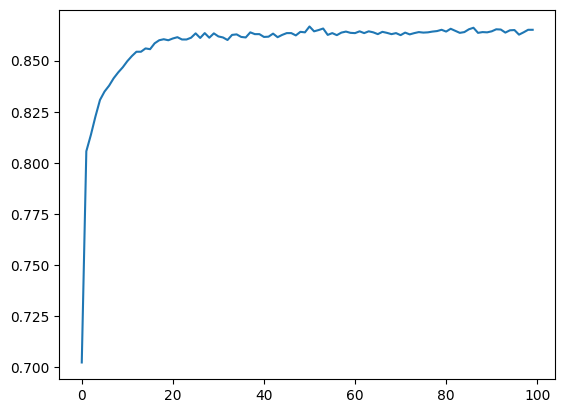

In [70]:
plt.plot(results.history['accuracy'])

In [71]:
print(ann.predict(sc.transform([[0,1,0,376,0,29,4,115046,4,1,0,119346]])) > 0.5)

1/1 [==============================] - 0s 118ms/step
[[ True]]


In [73]:
print(ann.predict(sc.transform([[0,1,0,376,0,29,4,115046,4,1,0,119346]])) )

1/1 [==============================] - 0s 50ms/step
[[0.9923956]]


In [74]:
y_pred = ann.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [75]:
y_pred = (y_pred > 0.5)

In [76]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [77]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]])) )

1/1 [==============================] - 0s 60ms/step
[[0.02489345]]


In [79]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>0.5)

1/1 [==============================] - 0s 30ms/step
[[False]]


In [80]:

cm = confusion_matrix(y_test, y_pred)

In [81]:
print(cm)

[[1538   57]
 [ 210  195]]


In [82]:
accuracy_score(y_test, y_pred)

0.8665